In [4]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

## Load and Inspect the Data Set

In [8]:
df = pd.read_csv("/Users/sethumwalallawita/Desktop/Time-Wasters on Social Media.csv")

In [10]:
df.head()

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


In [12]:
df.shape
print("Number of raws:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of raws: 1000
Number of columns: 31


In [14]:
df.columns

Index(['UserID', 'Age', 'Gender', 'Location', 'Income', 'Debt',
       'Owns Property', 'Profession', 'Demographics', 'Platform',
       'Total Time Spent', 'Number of Sessions', 'Video ID', 'Video Category',
       'Video Length', 'Engagement', 'Importance Score', 'Time Spent On Video',
       'Number of Videos Watched', 'Scroll Rate', 'Frequency',
       'ProductivityLoss', 'Satisfaction', 'Watch Reason', 'DeviceType', 'OS',
       'Watch Time', 'Self Control', 'Addiction Level', 'CurrentActivity',
       'ConnectionType'],
      dtype='object')

In [16]:
df.describe()

,UserID,Age,Income,Total Time Spent,Number of Sessions,Video ID,Video Length,Engagement,Importance Score,Time Spent On Video,Number of Videos Watched,Scroll Rate,ProductivityLoss,Satisfaction,Self Control,Addiction Level
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.986000,59524.213000,151.406000,10.013000,4891.738000,15.214000,4997.159000,5.129000,14.973000,25.248000,49.774000,5.136000,4.864000,7.094000,2.906000
std,288.819436,13.497852,23736.212925,83.952637,5.380314,2853.144258,8.224953,2910.053701,2.582834,8.200092,14.029159,29.197798,2.122265,2.122265,2.058495,2.058495
min,1.000000,18.000000,20138.000000,10.000000,1.000000,11.000000,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,250.750000,29.000000,38675.250000,78.000000,6.000000,2542.000000,8.000000,2415.750000,3.000000,8.000000,14.000000,23.000000,3.000000,4.000000,5.000000,2.000000
50%,500.500000,42.000000,58805.000000,152.000000,10.000000,4720.500000,15.000000,5016.000000,5.000000,15.000000,25.000000,50.000000,5.000000,5.000000,7.000000,3.000000
75%,750.250000,52.000000,79792.250000,223.000000,15.000000,7346.000000,22.000000,7540.250000,7.000000,22.000000,37.000000,74.000000,6.000000,7.000000,8.000000,5.000000
max,1000.000000,64.000000,99676.000000,298.000000,19.000000,9997.000000,29.000000,9982.000000,9.000000,29.000000,49.000000,99.000000,9.000000,9.000000,10.000000,7.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   UserID                    1000 non-null   int64 
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Location                  1000 non-null   object
 4   Income                    1000 non-null   int64 
 5   Debt                      1000 non-null   bool  
 6   Owns Property             1000 non-null   bool  
 7   Profession                1000 non-null   object
 8   Demographics              1000 non-null   object
 9   Platform                  1000 non-null   object
 10  Total Time Spent          1000 non-null   int64 
 11  Number of Sessions        1000 non-null   int64 
 12  Video ID                  1000 non-null   int64 
 13  Video Category            1000 non-null   object
 14  Video Length             

## Data Cleaning

In [20]:
# Checking the null values of the Data set
df.isnull().sum()

UserID                      0
Age                         0
Gender                      0
Location                    0
Income                      0
Debt                        0
Owns Property               0
Profession                  0
Demographics                0
Platform                    0
Total Time Spent            0
Number of Sessions          0
Video ID                    0
Video Category              0
Video Length                0
Engagement                  0
Importance Score            0
Time Spent On Video         0
Number of Videos Watched    0
Scroll Rate                 0
Frequency                   0
ProductivityLoss            0
Satisfaction                0
Watch Reason                0
DeviceType                  0
OS                          0
Watch Time                  0
Self Control                0
Addiction Level             0
CurrentActivity             0
ConnectionType              0
dtype: int64

In [22]:
# Check for duplicates
duplicates = df.duplicated()
print("Number of Duplicates:", duplicates.sum())

Number of Duplicates: 0


## Feature Selection

In [24]:
# Select features for clustering
selected_features = ['Total Time Spent', 'Number of Sessions', 'Engagement', 
                     'Addiction Level', 'Satisfaction', 'ProductivityLoss']
features = df[selected_features]
features

,Total Time Spent,Number of Sessions,Engagement,Addiction Level,Satisfaction,ProductivityLoss
0,80,17,7867,5,7,3
1,228,14,5944,3,5,5
2,30,6,8674,2,4,6
3,101,19,2477,5,7,3
4,136,6,3093,0,2,8
...,...,...,...,...,...,...
995,144,7,5179,0,1,9
996,231,15,1803,0,2,8
997,165,1,9290,0,1,9
998,151,11,2050,5,7,3


## Normalization

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert back to DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
scaled_data

,Total Time Spent,Number of Sessions,Engagement,Addiction Level,Satisfaction,ProductivityLoss
0,-0.850977,1.299273,0.986675,1.017757,1.006976,-1.006976
1,0.912804,0.741406,0.325532,0.045687,0.064115,-0.064115
2,-1.446849,-0.746240,1.264128,-0.440348,-0.407316,0.407316
3,-0.600710,1.671184,-0.866451,1.017757,1.006976,-1.006976
4,-0.183600,-0.746240,-0.654666,-1.412417,-1.350177,1.350177
...,...,...,...,...,...,...
995,-0.088261,-0.560285,0.062518,-1.412417,-1.821607,1.821607
996,0.948557,0.927361,-1.098178,-1.412417,-1.350177,1.350177
997,0.162006,-1.676019,1.475914,-1.412417,-1.821607,1.821607
998,-0.004838,0.183538,-1.013257,1.017757,1.006976,-1.006976


## Determine the Clusters (Elbow Method)

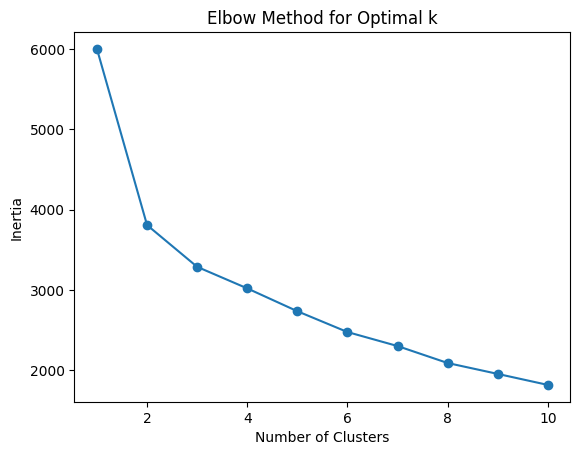

In [28]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.savefig('Elbow Method for Optimal k.png')
plt.show()

## Apply K-Means Clustering

In [30]:
from sklearn.cluster import KMeans

# Run K-Means with the optimal number of clusters (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

# Get cluster centers
centers = kmeans.cluster_centers_


## Evaluate Clustering with Silhouette Score

In [32]:
from sklearn.metrics import silhouette_score

# Calculate and print the Silhouette Score
sil_score = silhouette_score(scaled_data, kmeans.labels_)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.21799139745005855


## Visualize the Clusters

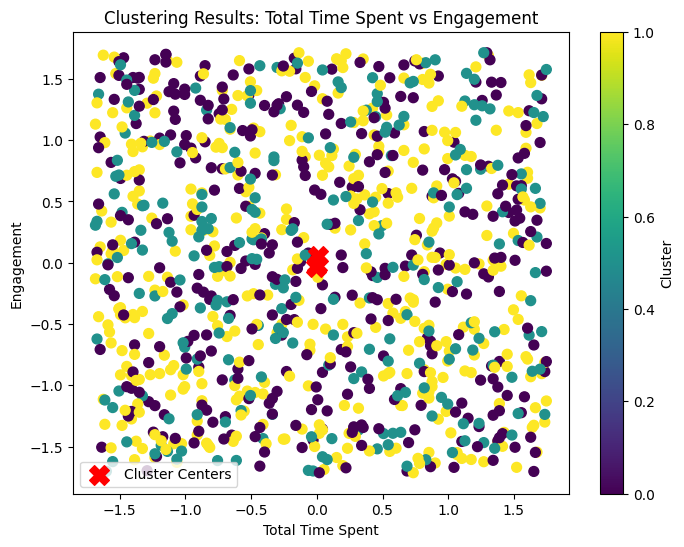

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Scatter plot for clustering results
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data['Total Time Spent'], scaled_data['Engagement'], c=df['Cluster'], cmap='viridis', s=50)

# Plot Cluster Centers
plt.scatter(centers[:, selected_features.index('Total Time Spent')], 
            centers[:, selected_features.index('Engagement')], 
            c='red', marker='X', s=200, label="Cluster Centers")

plt.title('Clustering Results: Total Time Spent vs Engagement')
plt.xlabel('Total Time Spent')
plt.ylabel('Engagement')
plt.colorbar(label='Cluster')
plt.legend()
plt.savefig('Clustering_Results_Total_Time_vs_Engagement.png')
plt.show()

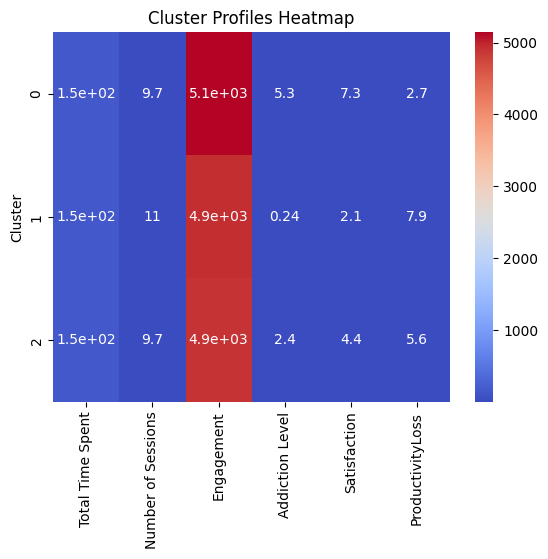

In [36]:
# Heatmap:
import seaborn as sns

# Analyze each cluster's feature means
cluster_profiles = df.groupby('Cluster')[selected_features].mean()

# Create a heatmap to visualize cluster profiles
sns.heatmap(cluster_profiles, annot=True, cmap='coolwarm')
plt.title('Cluster Profiles Heatmap')
plt.savefig('Cluster Profiles Heatmap.png')
plt.show()

## PCA for Dimensionality Reduction

### Apply PCA

In [38]:
from sklearn.decomposition import PCA

# Reduce to 2 principal components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Convert PCA results to DataFrame
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

In [82]:
pca_df

,PC1,PC2,Cluster
0,1.665308,-1.456689,0
1,0.067128,0.339890,2
2,-0.660481,-1.806719,2
3,1.600963,-0.059185,0
4,-2.332423,0.416917,1
...,...,...,...
995,-2.871344,-0.026206,1
996,-2.445274,1.321002,1
997,-2.758150,-0.668541,1
998,1.709826,0.659496,0


### PCA Scatter Plot

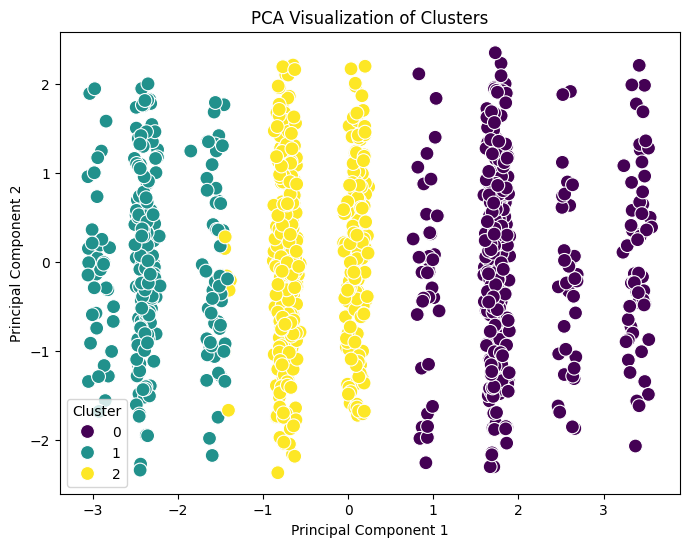

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)
plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.savefig('PCA Visualization of Clusters.png')
plt.show()


## Analyze Cluster Profiles

In [42]:
print("Cluster Profiles:")
print(cluster_profiles)

Cluster Profiles:
         Total Time Spent  Number of Sessions   Engagement  Addiction Level  \
Cluster                                                                       
0              152.113314            9.674221  5147.915014         5.305949   
1              151.457265           11.089744  4937.354701         0.243590   
2              150.772397            9.692494  4902.188862         2.363196   

         Satisfaction  ProductivityLoss  
Cluster                                  
0            7.305949          2.694051  
1            2.064103          7.935897  
2            4.363196          5.636804  


## Save Results

In [44]:
# Save the dataset with cluster labels and cluster profiles
df.to_csv('dark_side_social_media_with_clusters.csv', index=False)
cluster_profiles.to_csv('cluster_profiles.csv')